In [1]:
import tensorflow as tf
import keras_preprocessing  
# from tensorflow.keras import preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
import shutil


In [2]:
TRAINING_DIR = "Datasets 1-2\Training"

training_datagen = ImageDataGenerator(rescale = 1./255,
                                      horizontal_flip=True,
									  rotation_range=30,
									  height_shift_range=0.2,
                                      fill_mode='nearest')   
									
VALIDATION_DIR = "Datasets 1-2\Validation"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(224,224),
	class_mode='categorical',
  batch_size = 64
)

#print(train_generator)
validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(224,224),
	class_mode='categorical',
    batch_size= 16
)
len(train_generator)

Found 987 images belonging to 2 classes.
Found 239 images belonging to 2 classes.


16

In [3]:
# from tensorflow.keras.optimizers import RMSprop,Adam
# model = tf.keras.models.Sequential([
#           tf.keras.layers.Conv2D(96, (11,11), strides=(4,4), activation='relu', input_shape=(224, 224, 3)),
#           tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
#           tf.keras.layers.Conv2D(256, (5,5), activation='relu'),
#           tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
#           tf.keras.layers.Conv2D(384, (5,5), activation='relu'),
#           tf.keras.layers.MaxPooling2D(pool_size = (3,3), strides=(2,2)),
#           tf.keras.layers.Flatten(),
#           tf.keras.layers.Dropout(0.2),
#           tf.keras.layers.Dense(2048, activation='relu'),
#           tf.keras.layers.Dropout(0.25),
#           tf.keras.layers.Dense(1024, activation='relu'),
#           tf.keras.layers.Dropout(0.2),
#           tf.keras.layers.Dense(2, activation='softmax')
# ])
# model.compile(loss='categorical_crossentropy',
#               optimizer=Adam(lr=0.0001),
#               metrics=['acc'])
# model.summary()

In [4]:
# import numpy as np

# history = model.fit(
#     train_generator,
#     steps_per_epoch = 15,
#     epochs = 50,
#     validation_data = validation_generator,
#     validation_steps = 15
# )
# np.save('my_history_1.npy',history.history)

In [5]:
# model.save("pre.h5")

In [6]:
model=tf.keras.models.load_model('pre.h5')
model.summary()
print(model.evaluate(train_generator))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 6, 6, 384)         2457984   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 384)        0

In [7]:
import numpy as np
history=np.load('my_history_1.npy',allow_pickle='TRUE').item()

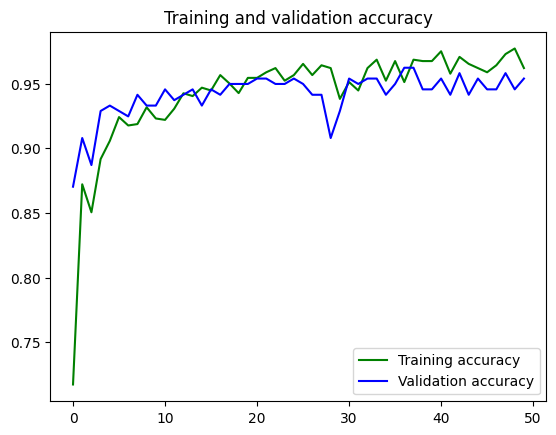

<Figure size 640x480 with 0 Axes>

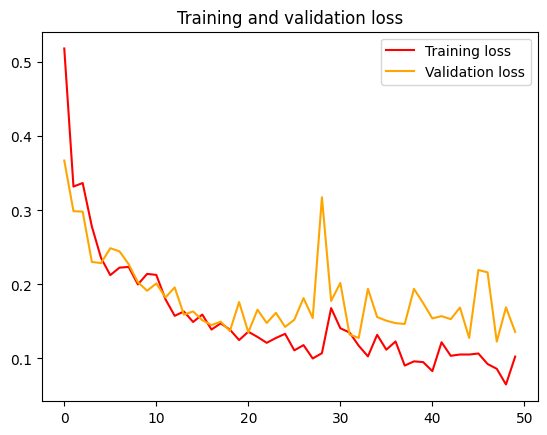

<Figure size 640x480 with 0 Axes>

In [8]:

%matplotlib inline
import matplotlib.pyplot as plt
acc = history['acc']
val_acc = history['val_acc']
loss = history['loss']
val_loss = history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'orange', label='Validation loss')
plt.title('Training and validation loss')

plt.legend(loc=0)
plt.figure()
plt.show()

In [9]:
import numpy as np
# import files
# from keras.preprocessing import image
from tensorflow.keras.preprocessing import image
import cv2
import smtplib
import winsound
import playsound
import requests
 
def send_mail_function(m):
    recipientEmail = "bittu22sharma12@gmail.com"
    recipientEmail = recipientEmail.lower()

    try:
        server = smtplib.SMTP('smtp.gmail.com', 587)
        server.ehlo()
        server.starttls()
        server.login("vik5as561@gmail.com",'oubackacqdcfrnmg')
        server.sendmail('vik5as561@gmail.com', recipientEmail, m)
        print("sent to {}".format(recipientEmail))
        server.close()
    except Exception as e:
        print(e)

# Opens the camera
cap= cv2.VideoCapture(0)
i=0
counter=0
count=0
while(cap.isOpened()):
    msg=requests.get("https://api.thingspeak.com/channels/2001988/feeds.json?api_key=9JKQUGR7PZKMNO74&results=2")
    msg=msg.json()['feeds'][-1]['field1']
    # print(msg)
    #print("\nThe Message sent was: \n\n"+str(msg))
    ret, frame = cap.read()
    img = cv2.resize(frame, (224, 224))
    #if ret == False:
       # break
    #cv2.imwrite('fire'+str(i)+'.jpg',frame)

    #path ='fire'+str(i)+'.jpg'
    #img = image.load_img(path, target_size=(224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0) /255
    classes = model.predict(x)
    #print(np.argmax(classes[0])==0, max(classes[0]))
    print(classes)
    if(classes[0][0]>classes[0][1]):
        print('no fire')
        if(float(msg)>45.00):
            count=count+1
            if(count>20):
                send_mail_function("Etremely High Temperatures detcted. Chances of Fire.")
                count=0
        image_path = r'C:\Users\Asus\Music\Fire detection 2\output images\no fire'+str(i)+'.jpg'
        cv2.imwrite(image_path,frame)
    else:
        print('fire')
        counter=counter+1
        if(counter>20):
            winsound.PlaySound('alarm.wav',winsound.SND_FILENAME)
            if(float(msg)>48.00):
                send_mail_function("Warning A Fire Accident has been reported.")
            else:
                send_mail_function("Alert! Chance of a fire Reported.")
            print('sound playing'+ str(counter))
            counter=0
       
        image_path = r'C:\Users\Asus\Music\Fire detection 2\output images\fire'+str(i)+'.jpg'
        cv2.imwrite(image_path,frame)
    i+=1
    cv2.imshow("output", frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break  

cap.release()
cv2.destroyAllWindows()


1/1 [==============================] - 0s 119ms/step
[[0.05608669 0.94391334]]
fire
1/1 [==============================] - 0s 32ms/step
[[0.13113643 0.8688635 ]]
fire
1/1 [==============================] - 0s 40ms/step
[[0.22393009 0.77606994]]
fire
1/1 [==============================] - 0s 31ms/step
[[0.29767388 0.7023261 ]]
fire
1/1 [==============================] - 0s 31ms/step
[[0.2885109  0.71148914]]
fire
1/1 [==============================] - 0s 38ms/step
[[0.37923312 0.6207669 ]]
fire
1/1 [==============================] - 0s 28ms/step
[[0.26601362 0.7339863 ]]
fire
1/1 [==============================] - 0s 29ms/step
[[0.8656194 0.1343806]]
no fire
1/1 [==============================] - 0s 41ms/step
[[0.78944755 0.21055241]]
no fire
1/1 [==============================] - 0s 30ms/step
[[0.85316455 0.14683548]]
no fire
1/1 [==============================] - 0s 40ms/step
[[0.8578711  0.14212883]]
no fire
1/1 [==============================] - 0s 28ms/step
[[0.85119057 0.14880943]